In [1]:
%matplotlib inline
# %config InlineBackend.figure_format='svg'

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from mpl_toolkits.mplot3d.axes3d import Axes3D

In [3]:
import numpy as np
import sympy

## Line Properties

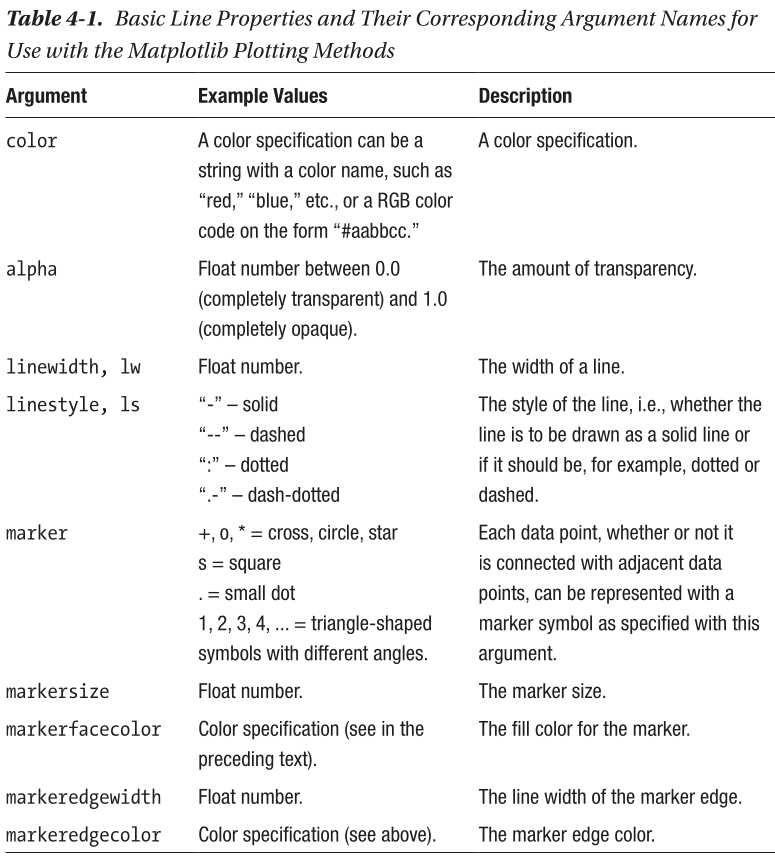

> To illustrate the use of these properties and arguments, consider the following code,
which draws horizontal lines with various values of the line width, line style, marker
symbol, color, and size. The resulting graph is shown in Figure 4-7.

### Prepare space for the plot

In [4]:
x = np.linspace(-5, 5, 5)
y = np.ones_like(x)

In [5]:
def axes_settings(fig, ax, title, ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, ymax+1)
    ax.set_title(title)

### Graphs showing the result of setting the line properties line width, line style, marker type and marker size, and color

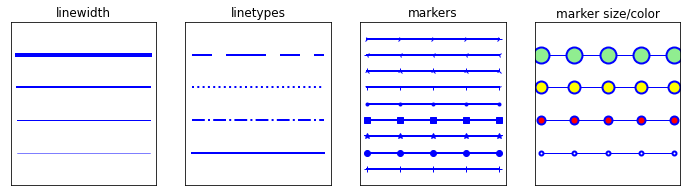

In [6]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

# Line width settings
linewidths = [0.5, 1.0, 2.0, 4.0]

for n, linewidth in enumerate(linewidths):
    axes[0].plot(x, y + n, color="blue", linewidth=linewidth)
    
axes_settings(fig, axes[0], "linewidth", len(linewidths))

# Line style settings
linestyles = ['-', '-.', ':']

for n, linestyle in enumerate(linestyles):
    axes[1].plot(x, y + n, color="blue", lw=2, linestyle=linestyle)
    
# custom dash style
line, = axes[1].plot(x, y + 3, color="blue", lw=2)

length1, gap1, length2, gap2 = 10, 7, 20, 7

line.set_dashes([length1, gap1, length2, gap2])

axes_settings(fig, axes[1], "linetypes", len(linestyles) + 1)

# marker types
markers = ['+', 'o', '*', 's', '.', '1', '2', '3', '4']
for n, marker in enumerate(markers):
    # lw = shorthand for linewidth, ls = shorthand for linestyle
    axes[2].plot(x, y + n, color="blue", lw=2, ls='-', marker=marker)
    
axes_settings(fig, axes[2], "markers", len(markers))

# marker size and color

markersizecolors = [(4, "white"), (8, "red"), (12, "yellow"), (16, "lightgreen")]

for n, (markersize, markerfacecolor) in enumerate(markersizecolors):
    axes[3].plot(x, y + n, color="blue", lw=1, ls='-', marker='o', markersize=markersize, 
                 markerfacecolor=markerfacecolor, markeredgewidth=2)
    
axes_settings(fig, axes[3], "marker size/color", len(markersizecolors))

> Consider the following example, where the function sin(x) is plotted together with its
first few series expansions around x = 0, as shown in the Graph

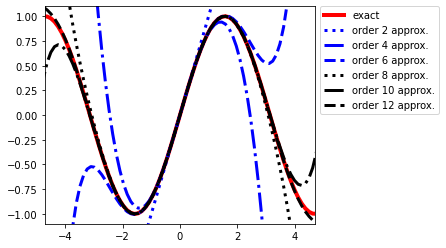

In [7]:
# a symbolic variable for x, and a numerical array with specific values of x

sym_x = sympy.Symbol("x")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

def sin_expansion(x, n):
    """
    Evaluate the nth order Taylor. series expansion
    of sin(x) for the numerical values in the array x.
    """
    return sympy.lambdify(sym_x, sympy.sin(sym_x).series(n=n+1).removeO(), 'numpy')(x)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), linewidth=4, color="red", label='exact')

colors = ["blue", "black"]
linestyles = [':', '-.', '--']

for idx, n in enumerate(range(1, 12, 2)):
    ax.plot(x, sin_expansion(x, n), color=colors[idx // 3],
            linestyle=linestyles[idx % 3], linewidth=3,
            label="order %d approx." % (n+1))
    
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)

# place a legend outsize of the Axes

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)

# make room for the legend to the right of the Axes
fig.subplots_adjust(right=.75)